### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
tf.random.set_seed(42)

In [3]:
tf.__version__

'2.1.0-rc1'

### Collect Data

In [4]:
import keras

Using TensorFlow backend.


In [5]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
First 5 examples now are:  [9 0 0 3 0]


In [7]:
print(testY[0:5])

[9 2 1 1 6]


In [0]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [9]:
import pandas as pd
class_names = pd.Series(class_names)
class_names

0    T-shirt/top
1        Trouser
2       Pullover
3          Dress
4           Coat
5         Sandal
6          Shirt
7        Sneaker
8            Bag
9     Ankle boot
dtype: object

In [0]:
trainX = trainX.astype('float32')

In [0]:
trainY = trainY.astype('float32')
testX = testX.astype('float32')
testY = testY.astype('float32')

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
#Training & test labels are the ones to be predicted so trainY & testY are to be one hot encoded
trainY = tf.keras.utils.to_categorical(trainY,num_classes=10)

In [0]:
testY1 = tf.keras.utils.to_categorical(testY,num_classes=10)

In [14]:
trainX.shape

(60000, 28, 28)

In [15]:
testX.shape

(10000, 28, 28)

In [16]:
trainY.shape

(60000, 10)

In [17]:
testY1.shape

(10000, 10)

In [18]:
testY.shape

(10000,)

### Visualize the data

Plot first 10 images in the triaining set and their labels.

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


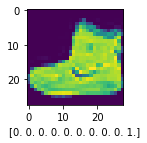

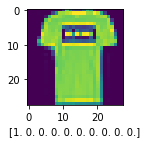

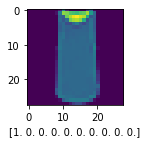

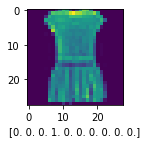

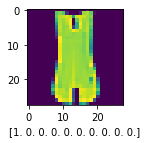

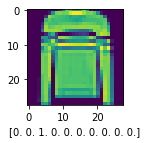

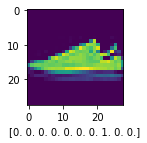

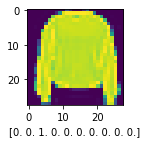

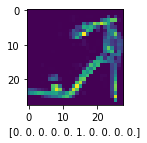

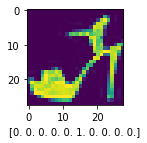

In [19]:
import matplotlib.pyplot as plt
i = 0
for i in range(10):
  figure = plt.figure(figsize=(10,10))
  plt.subplot(2,5,i+1)
  plt.imshow(trainX[i])
  plt.xlabel(trainY[i])
  i += 1

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
model = Sequential([layers.Flatten(input_shape=(28,28))])
model.add(Dense(60,input_dim=10,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer ='sgd',loss ='binary_crossentropy',metrics=['accuracy'])



### Execute the model using model.fit()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 60)                47100     
_________________________________________________________________
dense_1 (Dense)              (None, 40)                2440      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 50,570
Trainable params: 50,570
Non-trainable params: 0
_________________________________________________________________


In [22]:
test_loss, test_acc = model.evaluate(testX,  testY1, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest Loss', test_loss)

10000/10000 - 2s - loss: 2.4051 - accuracy: 0.8222

Test accuracy: 0.8221801

Test Loss 2.4050881650924683


In [23]:
model.fit(trainX,trainY,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3187 - accuracy: 0.9158
Epoch 2/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2279 - accuracy: 0.9275
Epoch 3/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1961 - accuracy: 0.9360
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1600 - accuracy: 0.9476
Epoch 5/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1516 - accuracy: 0.9491
Epoch 6/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1447 - accuracy: 0.9501
Epoch 7/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1322 - accuracy: 0.9538
Epoch 8/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1250 - accuracy: 0.9551
Epoch 9/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1185 - accuracy: 0.9563
Epoch 10/10
60

### Execute the model

In [24]:
y_pred=model.predict(testX)
y_pred

array([[6.1812083e-11, 3.4835963e-08, 1.4150280e-13, ..., 6.7229599e-02,
        5.9028243e-06, 8.9702487e-01],
       [1.0639594e-01, 6.3272610e-02, 2.0054005e-01, ..., 4.8998859e-02,
        4.9432263e-02, 4.3272305e-02],
       [9.0381651e-15, 9.9999058e-01, 3.9061482e-28, ..., 9.3901503e-13,
        4.1442364e-19, 1.2339581e-21],
       ...,
       [1.7207598e-02, 1.2511700e-14, 1.1728664e-10, ..., 1.7765051e-10,
        9.5109355e-01, 1.1008251e-06],
       [6.3953515e-10, 9.9932599e-01, 4.1150098e-19, ..., 2.2005828e-07,
        7.1979441e-12, 4.3102203e-13],
       [7.4518503e-05, 8.9089212e-07, 3.7040453e-09, ..., 1.2821184e-01,
        1.8035413e-06, 4.1430943e-02]], dtype=float32)

In [25]:
import numpy as np
out = []
for val in y_pred:
  out.append(np.argmax(val))
print(out)

[9, 2, 1, 1, 2, 1, 2, 2, 5, 7, 2, 5, 5, 3, 2, 1, 6, 2, 8, 0, 0, 5, 7, 8, 1, 2, 2, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 9, 2, 9, 6, 1, 2, 2, 2, 2, 5, 0, 4, 6, 8, 2, 8, 0, 7, 7, 8, 0, 1, 1, 2, 2, 7, 8, 7, 0, 6, 0, 2, 3, 1, 2, 8, 2, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 1, 2, 7, 1, 8, 0, 1, 2, 2, 3, 2, 7, 2, 7, 8, 5, 9, 9, 2, 2, 5, 7, 0, 5, 2, 8, 2, 7, 0, 0, 0, 9, 9, 3, 0, 8, 2, 1, 5, 2, 1, 9, 1, 8, 2, 2, 1, 2, 5, 1, 0, 0, 0, 1, 0, 1, 3, 6, 2, 6, 6, 1, 3, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 2, 7, 2, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 0, 0, 7, 9, 9, 2, 2, 7, 1, 2, 3, 2, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 2, 0, 7, 9, 8, 2, 1, 8, 2, 1, 3, 1, 2, 7, 2, 8, 5, 6, 0, 7, 7, 0, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 2, 2, 5, 2, 9, 2, 2, 8, 2, 2, 2, 2, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 2, 8, 0, 0, 2, 1, 0, 9, 0, 1, 6, 0, 2, 3, 0, 8, 3, 7, 2, 0, 1, 2, 3, 0, 2, 0, 7, 5, 1, 5, 9, 5, 2, 5, 5, 1, 9, 8, 0, 3, 3, 2, 8, 0, 0, 2, 9, 7, 7, 1, 0, 0, 2, 2, 2, 7, 1, 2, 2, 8, 2, 0, 5, 2, 2, 7, 7, 7, 3, 3, 7, 2, 

In [26]:
np.unique(out)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
from sklearn.metrics import classification_report,accuracy_score
acc = accuracy_score(testY,out)
report = classification_report(testY,out)
print("The accuracy of the model is {}%".format(acc*100))
print("The following is the classification report:-\n {}".format(report))

The accuracy of the model is 72.85000000000001%
The following is the classification report:-
               precision    recall  f1-score   support

         0.0       0.59      0.85      0.70      1000
         1.0       0.98      0.94      0.96      1000
         2.0       0.36      0.78      0.50      1000
         3.0       0.88      0.79      0.83      1000
         4.0       0.65      0.13      0.22      1000
         5.0       0.95      0.93      0.94      1000
         6.0       0.30      0.15      0.20      1000
         7.0       0.94      0.92      0.93      1000
         8.0       0.96      0.85      0.90      1000
         9.0       0.93      0.94      0.93      1000

    accuracy                           0.73     10000
   macro avg       0.75      0.73      0.71     10000
weighted avg       0.75      0.73      0.71     10000



### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.001),loss = 'binary_crossentropy',metrics = ['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 60)                47100     
_________________________________________________________________
dense_1 (Dense)              (None, 40)                2440      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 50,570
Trainable params: 50,570
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(trainX,trainY,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1050 - accuracy: 0.9591
Epoch 2/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1035 - accuracy: 0.9596
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1025 - accuracy: 0.9599
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1014 - accuracy: 0.9601
Epoch 5/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0998 - accuracy: 0.9604
Epoch 6/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0977 - accuracy: 0.9609
Epoch 7/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0951 - accuracy: 0.9616
Epoch 8/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0929 - accuracy: 0.9623
Epoch 9/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0914 - accuracy: 0.9625
Epoch 10/10
60

In [0]:
y_pred1 = model.predict(testX)

In [32]:
import numpy as np
out1 = []
for val in y_pred1:
  out1.append(np.argmax(val))
print(out1)

[9, 4, 1, 1, 2, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 6, 5, 7, 5, 1, 4, 2, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 7, 6, 7, 6, 1, 2, 2, 4, 2, 5, 6, 4, 4, 8, 0, 8, 0, 7, 7, 8, 5, 1, 1, 2, 4, 7, 8, 7, 0, 2, 6, 4, 3, 1, 4, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 1, 6, 7, 1, 8, 0, 1, 2, 4, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 4, 8, 4, 7, 8, 6, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 2, 6, 1, 4, 5, 1, 0, 0, 0, 1, 6, 1, 3, 6, 6, 6, 6, 1, 3, 5, 0, 4, 7, 9, 3, 7, 4, 3, 9, 0, 9, 4, 7, 4, 4, 6, 5, 4, 1, 4, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 4, 3, 4, 3, 4, 8, 3, 6, 1, 1, 0, 4, 9, 4, 2, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 2, 7, 2, 8, 5, 6, 0, 7, 7, 6, 6, 7, 0, 7, 8, 9, 4, 9, 0, 5, 1, 4, 4, 5, 4, 9, 6, 4, 8, 6, 4, 6, 4, 9, 7, 6, 5, 5, 4, 8, 5, 4, 3, 0, 2, 8, 0, 0, 6, 3, 8, 9, 6, 1, 6, 0, 4, 3, 0, 8, 3, 7, 4, 0, 1, 2, 3, 0, 6, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 0, 3, 3, 6, 8, 0, 0, 4, 9, 7, 7, 1, 6, 6, 6, 2, 4, 7, 1, 6, 4, 8, 2, 6, 5, 6, 6, 7, 7, 7, 3, 3, 7, 6, 

In [33]:
np.unique(out)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
from sklearn.metrics import classification_report,accuracy_score
acc1 = accuracy_score(testY,out1)
report1 = classification_report(testY,out1)
print("The accuracy of the model is {}%".format(acc1*100))
print("The following is the classification report:-\n {}".format(report1))

The accuracy of the model is 77.75999999999999%
The following is the classification report:-
               precision    recall  f1-score   support

         0.0       0.77      0.72      0.74      1000
         1.0       0.98      0.94      0.96      1000
         2.0       0.42      0.21      0.28      1000
         3.0       0.86      0.82      0.84      1000
         4.0       0.49      0.77      0.60      1000
         5.0       0.95      0.95      0.95      1000
         6.0       0.50      0.56      0.53      1000
         7.0       0.93      0.94      0.94      1000
         8.0       0.95      0.93      0.94      1000
         9.0       0.95      0.93      0.94      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.77     10000
weighted avg       0.78      0.78      0.77     10000



### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model1 = Sequential([layers.Flatten(input_shape=(28,28))])
model1.add(Dense(100,input_dim = 4,activation='relu'))
model1.add(Dense(100,activation='sigmoid'))
model1.add(Dense(10,activation='softmax'))
model1.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.03),loss = 'binary_crossentropy',metrics = ['accuracy'])

## Review model

In [36]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [37]:
test_loss, test_accuracy=model1.evaluate(testX,testY1)
print("This test loss is {}%.".format(test_loss * 100))
print("The test accuracy acheived is {}%.".format(test_accuracy * 100))

10000/10000 [==============================] - 1s 59us/sample - loss: 0.3445 - accuracy: 0.8986
This test loss is 34.446924815177915%.
The test accuracy acheived is 89.86095786094666%.


### Run the model

In [38]:
model1.fit(trainX,trainY,epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1533 - accuracy: 0.9418
Epoch 2/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1033 - accuracy: 0.9604
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0923 - accuracy: 0.9647
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0876 - accuracy: 0.9660
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0846 - accuracy: 0.9674
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0813 - accuracy: 0.9682
Epoch 7/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0795 - accuracy: 0.9690
Epoch 8/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0780 - accuracy: 0.9694
Epoch 9/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0768 - accuracy: 0.9698
Epoch 10/10
60

In [39]:
y_pred2 = model.predict(testX)
y_pred2

array([[2.58887129e-15, 1.21104804e-09, 2.00213360e-17, ...,
        1.11378625e-01, 4.45072951e-10, 8.49612653e-01],
       [7.09038526e-02, 4.42711776e-03, 3.57828498e-01, ...,
        2.58376710e-02, 5.17221261e-03, 7.07367063e-03],
       [9.06349076e-16, 9.99997020e-01, 1.85664827e-27, ...,
        1.40966336e-10, 1.86611582e-17, 9.32044884e-19],
       ...,
       [4.34004731e-04, 2.52271492e-17, 2.55906594e-14, ...,
        1.87572180e-12, 9.94739950e-01, 6.25695691e-08],
       [7.62886698e-11, 9.99592602e-01, 3.97602068e-20, ...,
        4.87226316e-06, 1.16855373e-10, 1.57230427e-11],
       [1.65684412e-07, 5.52469892e-09, 3.43156059e-13, ...,
        1.72716707e-01, 2.95402947e-09, 2.83226045e-03]], dtype=float32)

In [40]:
import numpy as np
out2 = []
for val in y_pred2:
  out2.append(np.argmax(val))
print(out2)

[9, 4, 1, 1, 2, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 6, 5, 7, 5, 1, 4, 2, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 7, 6, 7, 6, 1, 2, 2, 4, 2, 5, 6, 4, 4, 8, 0, 8, 0, 7, 7, 8, 5, 1, 1, 2, 4, 7, 8, 7, 0, 2, 6, 4, 3, 1, 4, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 1, 6, 7, 1, 8, 0, 1, 2, 4, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 4, 8, 4, 7, 8, 6, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 2, 6, 1, 4, 5, 1, 0, 0, 0, 1, 6, 1, 3, 6, 6, 6, 6, 1, 3, 5, 0, 4, 7, 9, 3, 7, 4, 3, 9, 0, 9, 4, 7, 4, 4, 6, 5, 4, 1, 4, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 4, 3, 4, 3, 4, 8, 3, 6, 1, 1, 0, 4, 9, 4, 2, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 2, 7, 2, 8, 5, 6, 0, 7, 7, 6, 6, 7, 0, 7, 8, 9, 4, 9, 0, 5, 1, 4, 4, 5, 4, 9, 6, 4, 8, 6, 4, 6, 4, 9, 7, 6, 5, 5, 4, 8, 5, 4, 3, 0, 2, 8, 0, 0, 6, 3, 8, 9, 6, 1, 6, 0, 4, 3, 0, 8, 3, 7, 4, 0, 1, 2, 3, 0, 6, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 0, 3, 3, 6, 8, 0, 0, 4, 9, 7, 7, 1, 6, 6, 6, 2, 4, 7, 1, 6, 4, 8, 2, 6, 5, 6, 6, 7, 7, 7, 3, 3, 7, 6, 

In [41]:
np.unique(out)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
from sklearn.metrics import classification_report,accuracy_score
acc2 = accuracy_score(testY,out2)
report2 = classification_report(testY,out2)
print("The accuracy of the model is {}%".format(acc2*100))
print("The following is the classification report:-\n {}".format(report2))

The accuracy of the model is 77.75999999999999%
The following is the classification report:-
               precision    recall  f1-score   support

         0.0       0.77      0.72      0.74      1000
         1.0       0.98      0.94      0.96      1000
         2.0       0.42      0.21      0.28      1000
         3.0       0.86      0.82      0.84      1000
         4.0       0.49      0.77      0.60      1000
         5.0       0.95      0.95      0.95      1000
         6.0       0.50      0.56      0.53      1000
         7.0       0.93      0.94      0.94      1000
         8.0       0.95      0.93      0.94      1000
         9.0       0.95      0.93      0.94      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.77     10000
weighted avg       0.78      0.78      0.77     10000

